# Computational Social Science Project #3 

Max Wu

*Semester:* Fall 2023

In [1]:
# start with importing libraries 
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# settings for graphs
%matplotlib inline
sns.set_style("darkgrid")

# suppress runtime warning and userwarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# loading in Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index to the inspection ID and name of establishment
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.


<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

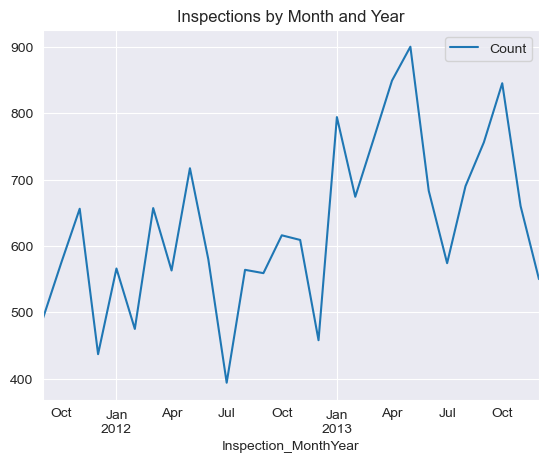

In [7]:
# visualize inspections over time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

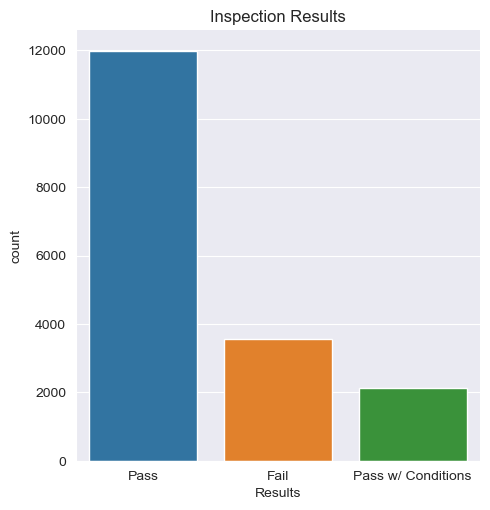

In [8]:
# view inspection results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

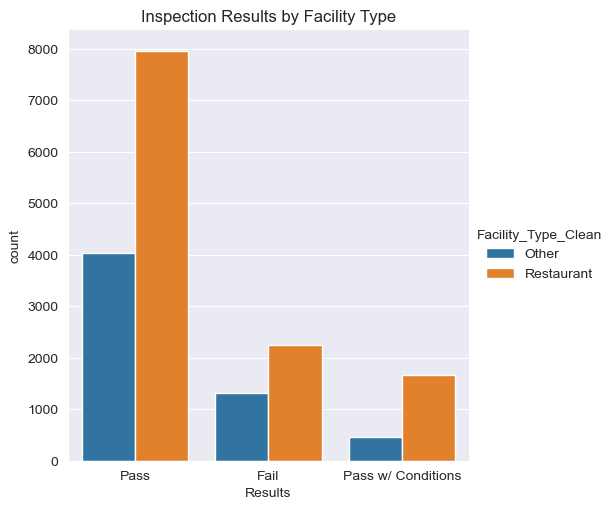

In [9]:
# view inspection results by facility type (restaurant or not)
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target by setting y to results
y = chicago_inspections_2011_to_2013['Results']

# binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])

# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)



### Model 1 - Logistic Regression

In [13]:
# import libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# set training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit scaler on the training data and transform both the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# assuming y_train and y_test are column vectors, reshape them to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# create a logistic regression model
model = LogisticRegression(max_iter=1000)

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# print the metrics
print(f" Accuracy: {accuracy} \n Precision: {precision} \n Recall: {recall} \n F1 Score: {f1}")


 Accuracy: 0.9245837414299706 
 Precision: 0.799396681749623 
 Recall: 0.8439490445859873 
 F1 Score: 0.8210689388071263


### Model 2 - AdaBoost

In [14]:
#import libraries for adaboost
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# initialize an adaptive boosting classifer 
ada_classifier = AdaBoostClassifier(n_estimators=100)

# perform cross validation
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

# define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# perform cross-validation with multiple scoring metrics
results = cross_validate(ada_classifier, X, y.ravel(), cv=5, scoring=scoring)

# extract and print the mean scores for each metric
accuracy_mean = results['test_accuracy'].mean()
precision_mean = results['test_precision'].mean()
recall_mean = results['test_recall'].mean()
f1_mean = results['test_f1'].mean()

print(f"Accuracy: {accuracy_mean}")
print(f"Precision: {precision_mean}")
print(f"Recall: {recall_mean}")
print(f"F1 Score: {f1_mean}")

Accuracy: 0.9146365471623236
Precision: 0.7792467108084036
Recall: 0.8066429586736111
F1 Score: 0.7912716172501808


### Model 3 - xgboost

In [15]:
# import libraries for xgboost, install xgboost if first time using it
#!pip install xgboost
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

# initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'Accuracy': make_scorer(accuracy_score),
          'Precision': make_scorer(precision_score),      
          'Recall': make_scorer(recall_score),
          'F1 Score': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_Accuracy', 'test_Recall', 'test_Precision', 'test_F1 Score']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():}")


Accuracy: 0.9182287571706125
Recall: 0.8354555134196682
Precision: 0.776978753103256
F1 Score: 0.8046540128289896


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

### <span style="color: red;">High recall means the model is better at identifying buildings that are not compliant with food safety regulations. Recall emphasizes the cost of false negatives, which in this case means missing non-compliant buildings. In this scenario, it's crucial to minimize false negatives to avoid overlooking safety concerns. It's not a big deal if we allow some false positives, or compliant buildings which are marked as non-compliant, because the worst thing that can happen performing an unnecessary audit. It is a big deal if we allow false negatives, because it can result in compromising peoples' healths. However, it's still valuable to look at all the other metrics of precision, accuracy, and F1 score to have a comprehensive understanding of our models' performances.</span>

### <span style="color: red;">For reference, the recall of my logistic regression is 0.8439, the recall of adaboost is 0.8066, and the recall of xgboost is 0.8354.</span>


## 4. Policy Simulation

### 4.1 Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

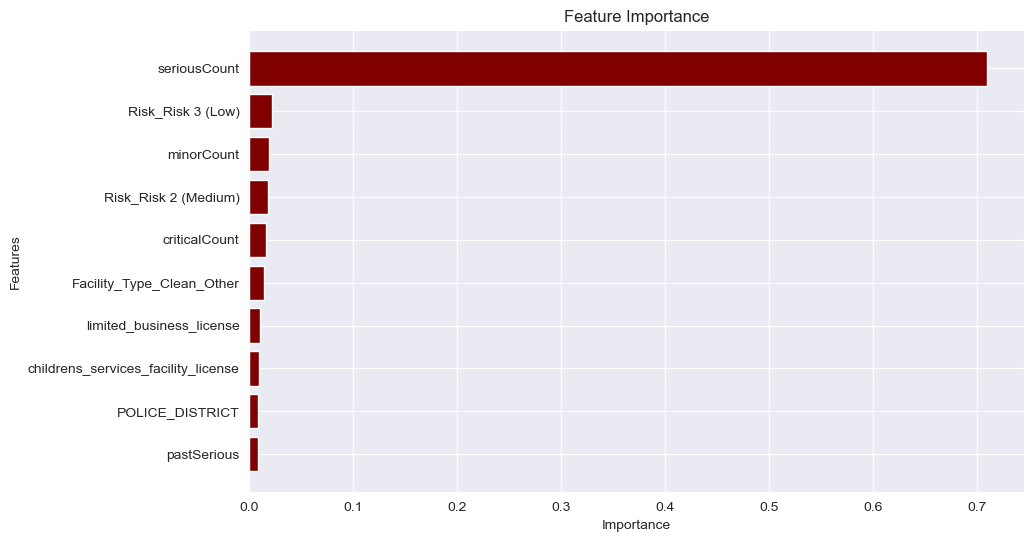

In [16]:
# i'll make a feature importance plot

# initialize an array to hold the feature importances
importances = np.zeros(X.shape[1])

# average the feature importances over the folds
for estimator in cv_results['estimator']:
    importances += estimator.feature_importances_
    
# divide by the number of folds
importances /= 5  

# create a DataFrame for visualization
feature_importance = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances})

# sort the features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# take the top 10 features
feature_importance = feature_importance.head(10)

# plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance['feature'], 
         feature_importance['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

plt.gca().invert_yaxis() 
plt.show()

### <span style="color: red;">Based on our xgboost model, it looks like 'seriousCount' is the most important feature, in a league of its own. It is followed by 'Risk_Risk 3 (Low)', 'minorCount', and 'Risk_Risk 2 (Medium)'. It is a bit surprising that the feature importance of low risk was more important than medium risk. The feature importance plot also tells us that most features except for 'seriousCount' are all fairly unimportant.</span>

### <span style="color: red;">In terms of additional features which would be useful to incorporate into the model, I am curious about the type of product, service, or food sold. If a major cause of failed inspections is related to temperature control, it seems like certain restaurants that serve food which must be regulated at specific temperatures might be more likely to fail (maybe like sushi restaurants). I might also be curious about things such as nearby sanitation complaints or whether the establishment is a chain or franchise versus family owned.</span>

### 4.2 Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random.

Generate a list of the 1,000 riskiest establishments. Using your chosen metric, demonstrate how well your algorithm prioritized finding potential violations. Then conduct a simulation where you choose 1,000 establishments to randomly audit. How well did random audits do? How did random auditing compare to predictive auditing?


In [17]:

# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.


# i'll choose xgboost, since i'm using for a different class as well, so i want to get more familiar with it

# set up training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# initialize XGBoost classifier
model = xgb.XGBClassifier()

# train the model
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
# 2. Order your audits by their probability of detecting a "Fail" score

# predict probabilities for the positive class (1)
y_probabilities = model.predict_proba(X_test)[:, 1]

# create a DataFrame with outcomes and probabilities
audit_results = pd.DataFrame({'Outcome': y_test.ravel(), 'Probability': y_probabilities})

# sort by probability in descending order
sorted_audits = audit_results.sort_values(by='Probability', ascending=False)
sorted_audits

,Outcome,Probability
2706,1,9.998904e-01
1256,1,9.998885e-01
162,1,9.998519e-01
2232,1,9.998004e-01
2860,1,9.997117e-01
...,...,...
1266,0,2.374270e-06
298,0,1.788977e-06
1995,0,1.609221e-06
2480,0,5.657793e-07


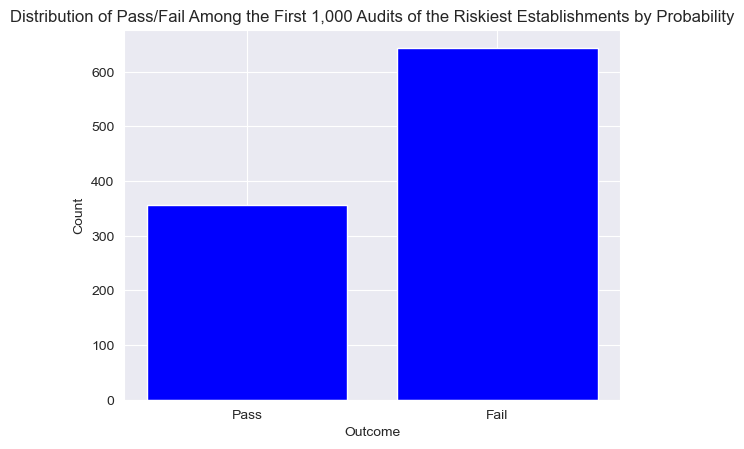

In [19]:
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset

# select the first 1,000 observations
first_1000_audits = sorted_audits.head(1000)

# plot the distribution
plt.hist(first_1000_audits['Outcome'], bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8, color='blue')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Pass/Fail Among the First 1,000 Audits of the Riskiest Establishments by Probability')
plt.xticks([0, 1], ['Pass', 'Fail'])
plt.show()

                                            Facility_Type             Results
Inspection_ID DBA_Name                                                       
509479        LALOS MEXICAN RESTAURANT         Restaurant                Pass
1296605       THE BOUNDARY                     Restaurant                Pass
1294215       LAS TABLAS ON LINCOLN            Restaurant                Fail
671057        TAMALES ROSA                     Restaurant                Pass
539452        TRANSPORTATION CENTER            Restaurant                Pass
...                                                   ...                 ...
1166238       DUNKIN DONUTS                    Restaurant                Pass
1354108       T'S PAISANS PIZZA & GRILL II     Restaurant                Fail
1229529       Floriole Bakery LLC                  Bakery  Pass w/ Conditions
679803        Subway Sandwiches                Restaurant                Pass
1114913       JEWEL FOOD  STORE # 3345      Grocery Store  Pass 

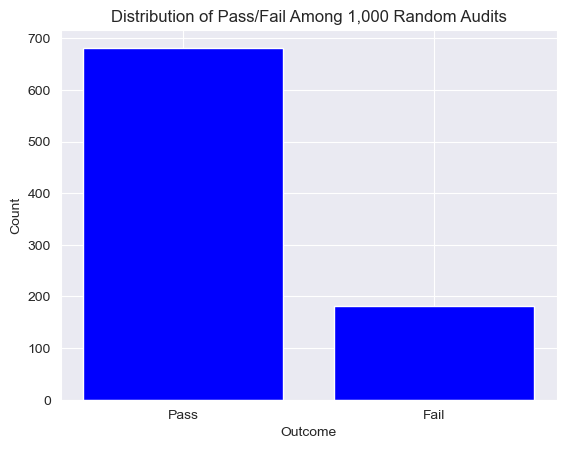

In [20]:
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

# set random state
random = 44

# pick columns we care about to print
key_columns = ['Facility_Type', 'Results',]  

# sample 1,000 observations randomly
random_audits = chicago_inspections_2011_to_2013[key_columns].sample(n=1000, random_state=random)

print(random_audits)

# plot the distribution
plt.hist(random_audits['Results'], bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8, color='blue')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Pass/Fail Among 1,000 Random Audits')
plt.xticks([0, 1], ['Pass', 'Fail'])
plt.show()

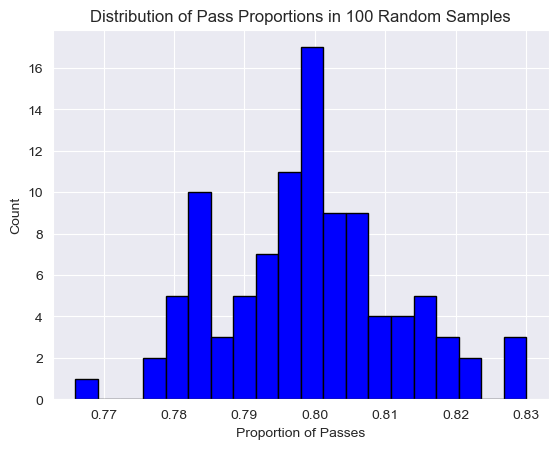

In [21]:
# want to create a graph which shows 100 iterations of 1,000 random audits 
# this is because there was high variance when i ran only 1 set of randomized 1,000 observations

# create mapping for categorical to numerical values
result_mapping = {'Pass': 1, 'Fail': 0, 'Pass w/ Conditions': 1}

# create a new DF for analysis
random_audits_analysis = chicago_inspections_2011_to_2013[key_columns].copy()

# map 'Results' column to numerical values in the new DF
random_audits_analysis['NumericResults'] = random_audits_analysis['Results'].map(result_mapping)

# list to store proportions
pass_proportions = []

# # of iterations
num_iterations = 100

for _ in range(num_iterations):
    # randomly sample 1,000 observations
    random_audits_i = random_audits_analysis.sample(n=1000)
    
    # calculate the proportion of passes
    pass_proportion = random_audits_i['NumericResults'].mean()
    
    # append to the list
    pass_proportions.append(pass_proportion)

# plot the distribution
plt.hist(pass_proportions, bins=20, color='blue', edgecolor='black')
plt.xlabel('Proportion of Passes')
plt.ylabel('Count')
plt.title('Distribution of Pass Proportions in 100 Random Samples')
plt.show()


### <span style="color: red;">It seems as though the xgboost model is working to predict health code violations better than randomly auditing. Of the 1,000 audits with the highest probabilities of failing predicted by the model, over 60% ended up failing. I ran 100 iterations of 1,000 randomized audits, and on average, 20% ended up failing, with the highest being 33%. I ran multiple iterations because I noticed the proportions kept changing in pretty significant ways every time I picked a new randomization. However, either way, our model performs much better; the establishments which are the riskiest indeed ended up being more likely to fail. </span>


### 4.3 Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [22]:
# data processing

# load in Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv", 
                                      low_memory=False)

# process target 
y2014 = chicago_inspections_2014['Results']

# binarize the outcome variable 
y2014 = y2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y2014 = lb_style.fit_transform(y2014)

# recode 0s and 1s so 1s are "Fail"
y2014 = np.where(y2014 == 1, 0 ,1)


# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome, also date and time info
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                         'License',
                                         'Address',
                                         'City',
                                         'State',
                                         'Zip',
                                         'Latitude',
                                         'Longitude',
                                         'Location',
                                         'ID',
                                         'LICENSE_ID',
                                         'LICENSE_TERM_START_DATE',
                                         'LICENSE_TERM_EXPIRATION_DATE',
                                         'LICENSE_STATUS',
                                         'ACCOUNT_NUMBER',
                                         'LEGAL_NAME',
                                         'DOING_BUSINESS_AS_NAME',
                                         'ADDRESS',
                                         'CITY',
                                         'STATE',
                                         'ZIP_CODE',
                                         'WARD',
                                         'PRECINCT',
                                         'LICENSE_CODE',
                                         'BUSINESS_ACTIVITY_ID',
                                         'BUSINESS_ACTIVITY',
                                         'LICENSE_NUMBER',
                                         'LATITUDE',
                                         'LONGITUDE',
                                         'Inspection_Date',
                                         'minDate',
                                         'maxDate',
                                         'Results'],
                                     inplace = True)



# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)



# create feature dataset
X2014 = chicago_inspections_2014.drop(columns = ['Facility_Type', 
                                                 'LICENSE_DESCRIPTION', 
                                                 'WARD_PRECINCT'])

# get dummies
X2014 = pd.get_dummies(X2014)

In [23]:
# initialize XGBoost classifier
model = xgb.XGBClassifier()

# train the model
model.fit(X2014, y2014)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,            # specify estimator 
                            X2014,                     # specify features
                            y2014.ravel(),             # specify outcome, and use ravel
                            cv=4,                      # specify 4-fold cross validation
                            return_estimator=True,     # return the estimators fitted at each split
                            scoring=scoring)           # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_Accuracy', 'test_Recall', 'test_Precision', 'test_F1 Score']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():}")


Accuracy: 0.8968217768390778
Recall: 0.7731696428571428
Precision: 0.7203163066973659
F1 Score: 0.7442989106029687


In [25]:
# predict and compare 

# predict probabilities for the positive class (1)
y2014_probabilities = model.predict_proba(X2014)[:, 1]

# create a DataFrame with outcomes and probabilities
audit_results = pd.DataFrame({'Outcome': y2014.ravel(), 'Probability': y2014_probabilities})

# sort by probability in descending order
sorted_audits = audit_results.sort_values(by='Probability', ascending=False)

sorted_audits


,Outcome,Probability
3890,1,0.999808
4259,1,0.999804
4524,1,0.999738
1665,1,0.999735
3154,1,0.999719
...,...,...
4303,0,0.000003
3129,0,0.000003
4275,0,0.000003
4448,0,0.000002


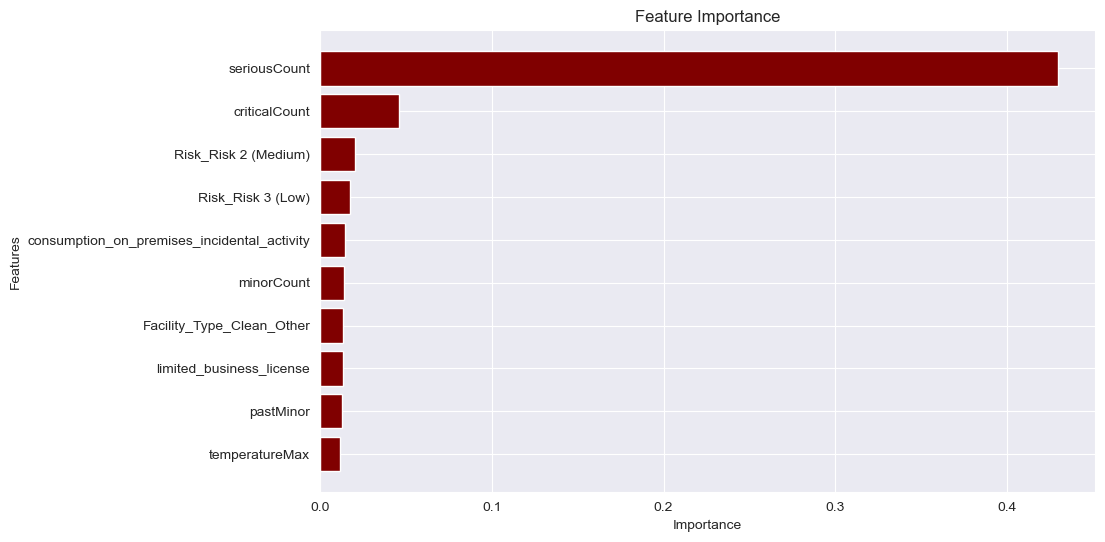

In [29]:
# evaluate
# what features were most important?

# let's look at the feature importance

# initialize an array to hold the feature importances
importances2014 = np.zeros(X2014.shape[1])

# average the feature importances over the folds
for estimator in cv_results['estimator']:
    importances2014 += estimator.feature_importances_
    
# divide by the number of folds
importances2014 /= 5  

# create a DataFrame for visualization
feature_importance2014 = pd.DataFrame({'feature': X2014.columns, 
                                   'importance': importances2014})

# sort the features by importance
feature_importance2014 = feature_importance2014.sort_values('importance', ascending=False)

# take the top 10 features
feature_importance2014 = feature_importance2014.head(10)

# plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance2014['feature'], 
         feature_importance2014['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

plt.gca().invert_yaxis() 
plt.show()


### <span style="color: red;">Based on the xgboost model, once again, it looks like 'seriousCount' is the most important feature by far, just as it was in the 2011-2013 data. However, from here, it differs from the 2011-2013 dataset-trained model. The second most important feature is 'criticalCount', and it is actually also fairly ahead of the the next features. Then, 'Risk_Risk 2 (Medium)' and 'Risk_Risk 3 (Low)' are the next most important features. If we were to use the model trained on 2011-2013 data to predict on the 2014 data, we would probably see worse performance for this reason.</span>

### <span style="color: red;">In terms of making predictions using XGBoost, we have an accuracy of 0.8968, which is quite solid, and a recall of 0.7732, which is good too, but could be higher. I think using recall makes the most sense from a policy perspective once again, as the most important outcome is how well we can detect violations and avoid undetected violations. I also think XGBoost is the best model for this sort of predicting, at least compared to AdaBoost and logistic regression, because it handles non-linear complex relationships in data better and is less sensitive to outliers than logistic regression, and it includes regularization terms in its objective function, which helps to prevent overfitting better than AdaBoost.</span>

### <span style="color: red;">That being said, the model's performance is not without flaws, as all three models (XGBoost, AdaBoost, and logistic regression) produced noticeably higher scoring metrics (accuracy, recall, F1, and precision) when trained on the 2011-2013 data compared to the 2014 dataset. I suspect this may have to do with the difference in sample size, as the 2011-2013 data had more observations to train the algorithm on.</span>


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

**YOUR ANSWER HERE**...

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...
